In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
infol = '/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/Majorlineage/BLU/BLU_major_rankedV1'

#col='(OwnGroup_avg_delta rank+OtherGroup_avg_delta rank)/2'
col='(Minimum delta rank+Average delta rank)/2'
infiles = os.listdir(infol)
if '.ipynb_checkpoints' in infiles:
    infiles.remove('.ipynb_checkpoints')
if '.DS_Store' in infiles:
    infiles.remove('.DS_Store')
    
outfol = infol + '_figures'
os.mkdir(infol + '_figures')

outfolpos = infol + '_inflectionpos'
os.mkdir(outfolpos)

166
211
610
236
769


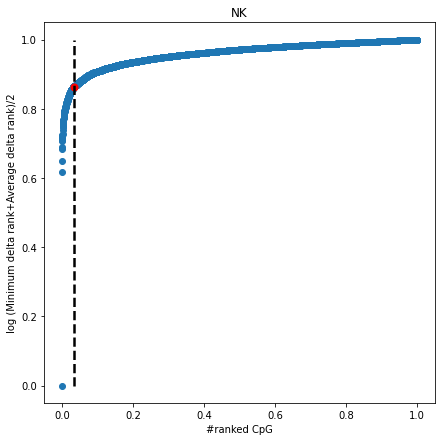

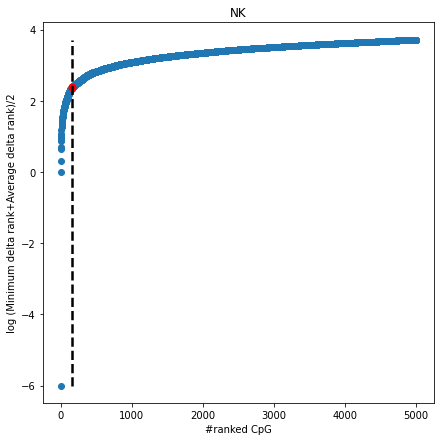

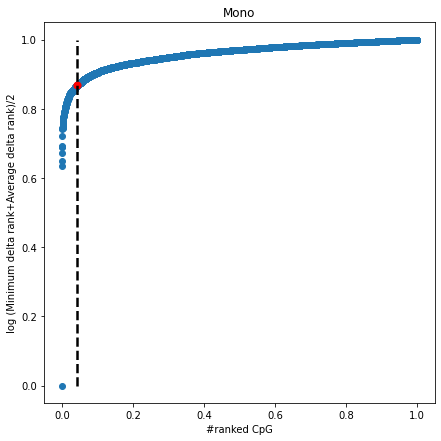

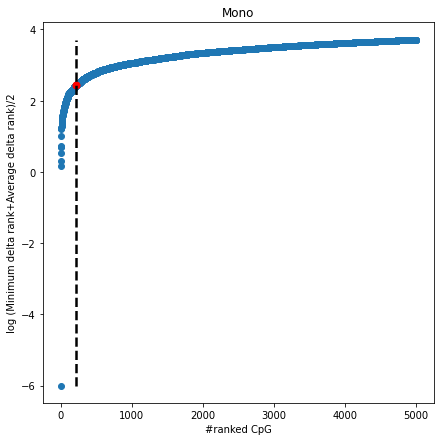

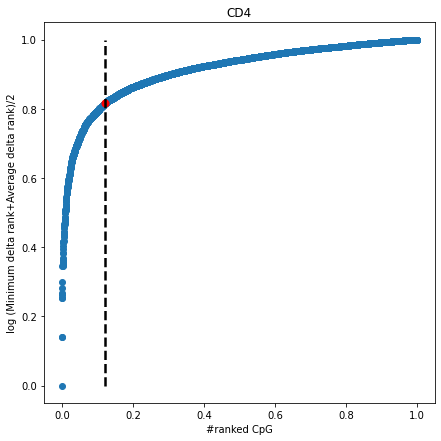

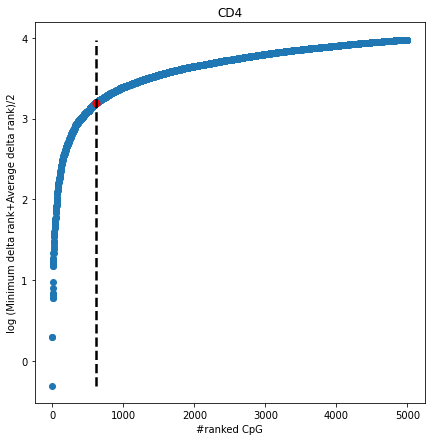

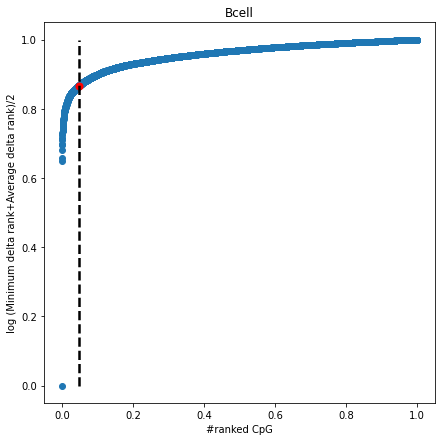

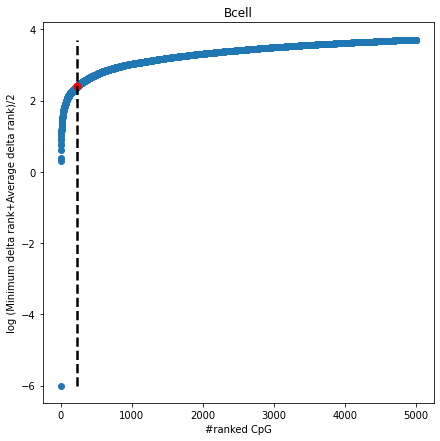

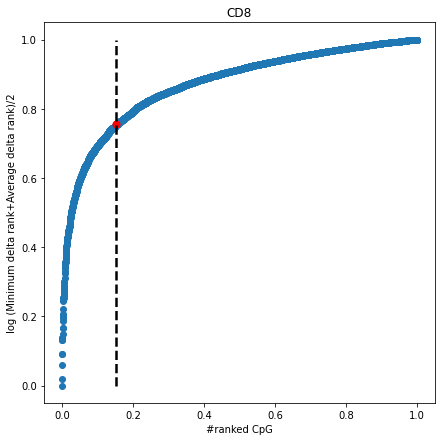

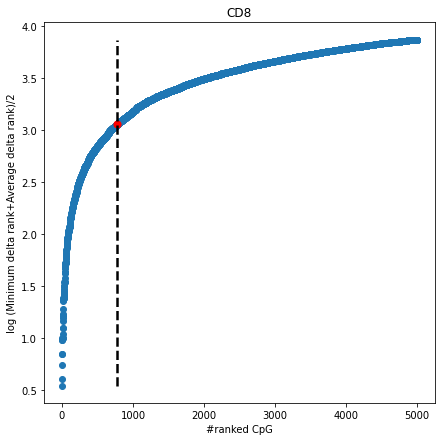

In [2]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

cell_dict = {}
for file in infiles:
    infile = infol + '/' + file
    cell = file.split('_')[0]
    indf=pd.read_csv(infile,sep='\t')
    indf.reset_index(inplace=True)
   
    indf['log10'+col]= np.log10(np.array(indf[col]) + 1e-6)
    indf['log10'+col+'_normalized']=NormalizeData(indf['log10'+col])
    indf['Norm_index']=NormalizeData(indf['index'])
    spec = 1 - np.array(indf['Norm_index'])
    sens = np.array(indf['log10'+col+'_normalized'])
    gmeans = np.sqrt(sens * spec)
    ix = np.argmax(gmeans)
    thresh_x = np.array(indf['Norm_index'])[ix]
    thresh_y = sens[ix]
    fig1, ax1 = plt.subplots(1, 1, figsize=(7,7))
    ax1.scatter(np.array(indf['Norm_index']), np.array(indf['log10'+col+'_normalized']))
    ax1.plot([thresh_x, thresh_x], [min(np.array(indf['Norm_index'])), max(np.array(indf['Norm_index']))], c='k', ls='--', lw=2.5)
    ax1.scatter([thresh_x], [thresh_y], c='r', s=50)
    ax1.set_xlabel('#ranked CpG')
    ax1.set_ylabel('log '+col)
    ax1.set_title(cell)
    fig1.savefig(outfol + '/' + file + '_roc_curve_normalized.pdf', bbox_inches='tight')
    # print('\nThreshold: \nx =', np.array(indf['index'])[ix], '\ny =', np.array(indf['log10'+col])[ix])
    cell_dict[cell] = [np.array(indf['index'])[ix]]
    
    #####pos######
    print(np.array(indf['index'])[ix])
    (indf.head(n=np.array(indf['index'])[ix]+1))[['chrom','start','end']].to_csv(outfolpos + '/' + file +"_pos.txt",sep='\t',index=None,header=None)
    #############
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(7,7))
    ax2.scatter(np.array(indf['index']), np.array(indf['log10'+col]))
    ax2.plot([np.array(indf['index'])[ix], np.array(indf['index'])[ix]], [min(np.array(indf['log10'+col])), max(np.array(indf['log10'+col]))], c='k', ls='--', lw=2.5)
    ax2.scatter([np.array(indf.index)[ix]], [np.array(indf['log10'+col])[ix]], c='r', s=50)
    ax2.set_xlabel('#ranked CpG')
    ax2.set_ylabel('log '+col)
    ax2.set_title(cell)
    fig2.savefig(outfol + '/' + file + '_roc_curve.pdf', bbox_inches='tight')

In [3]:
df_index = pd.DataFrame.from_dict(cell_dict, columns=['Index'], orient='index')
df_index.to_csv(infol + '_index.txt',sep='\t')
df_index

,Index
NK,166
Mono,211
CD4,610
Bcell,236
CD8,769


In [4]:
indf['log10'+col+'_normalized']=NormalizeData(indf['log10'+col])

indf['Norm_index']=NormalizeData(indf['index'])

In [5]:
#indf.plot.scatter(y='log10'+col+'_normalized',x='Norm_index')

In [6]:
spec = 1 - np.array(indf['Norm_index'])
sens = np.array(indf['log10'+col+'_normalized'])
gmeans = np.sqrt(sens * spec)
ix = np.argmax(gmeans)
thresh_x = np.array(indf['Norm_index'])[ix]
thresh_y = sens[ix]

Normalized Threshold: 
x = 0.15383076615323066 
y = 0.7545677625310548

Threshold: 
x = 769 
y = 3.0559514057109474


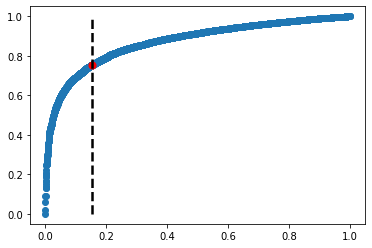

In [7]:
import matplotlib.pyplot as plt
plt.scatter(np.array(indf['Norm_index']), np.array(indf['log10'+col+'_normalized']))
plt.plot([thresh_x, thresh_x], [min(np.array(indf['Norm_index'])), max(np.array(indf['Norm_index']))], c='k', ls='--', lw=2.5)
plt.scatter([thresh_x], [thresh_y], c='r', s=50)
print('Normalized Threshold: \nx =', thresh_x, '\ny =', thresh_y)
print('\nThreshold: \nx =', np.array(indf.index)[ix], '\ny =', np.array(indf['log10'+col])[ix])
#plt.savefig(infile + '_roc_curve.pdf', bbox_inches='tight')